# INTRODUCTION TO REPRODUCIBLE RESEARCH WITH CONTAINERS ON OSCAR

### CCV BootCamp 2024 Ashok ragavendran

### Resources for help @Center for Computation and Visualization

#### Office hours

#### https://ccv.brown.edu

#### ccv-share slack channel

#### https://docs.ccv.brown.edu

#### support@ccv.brown.edu


 ## Why do we need reproducibility
 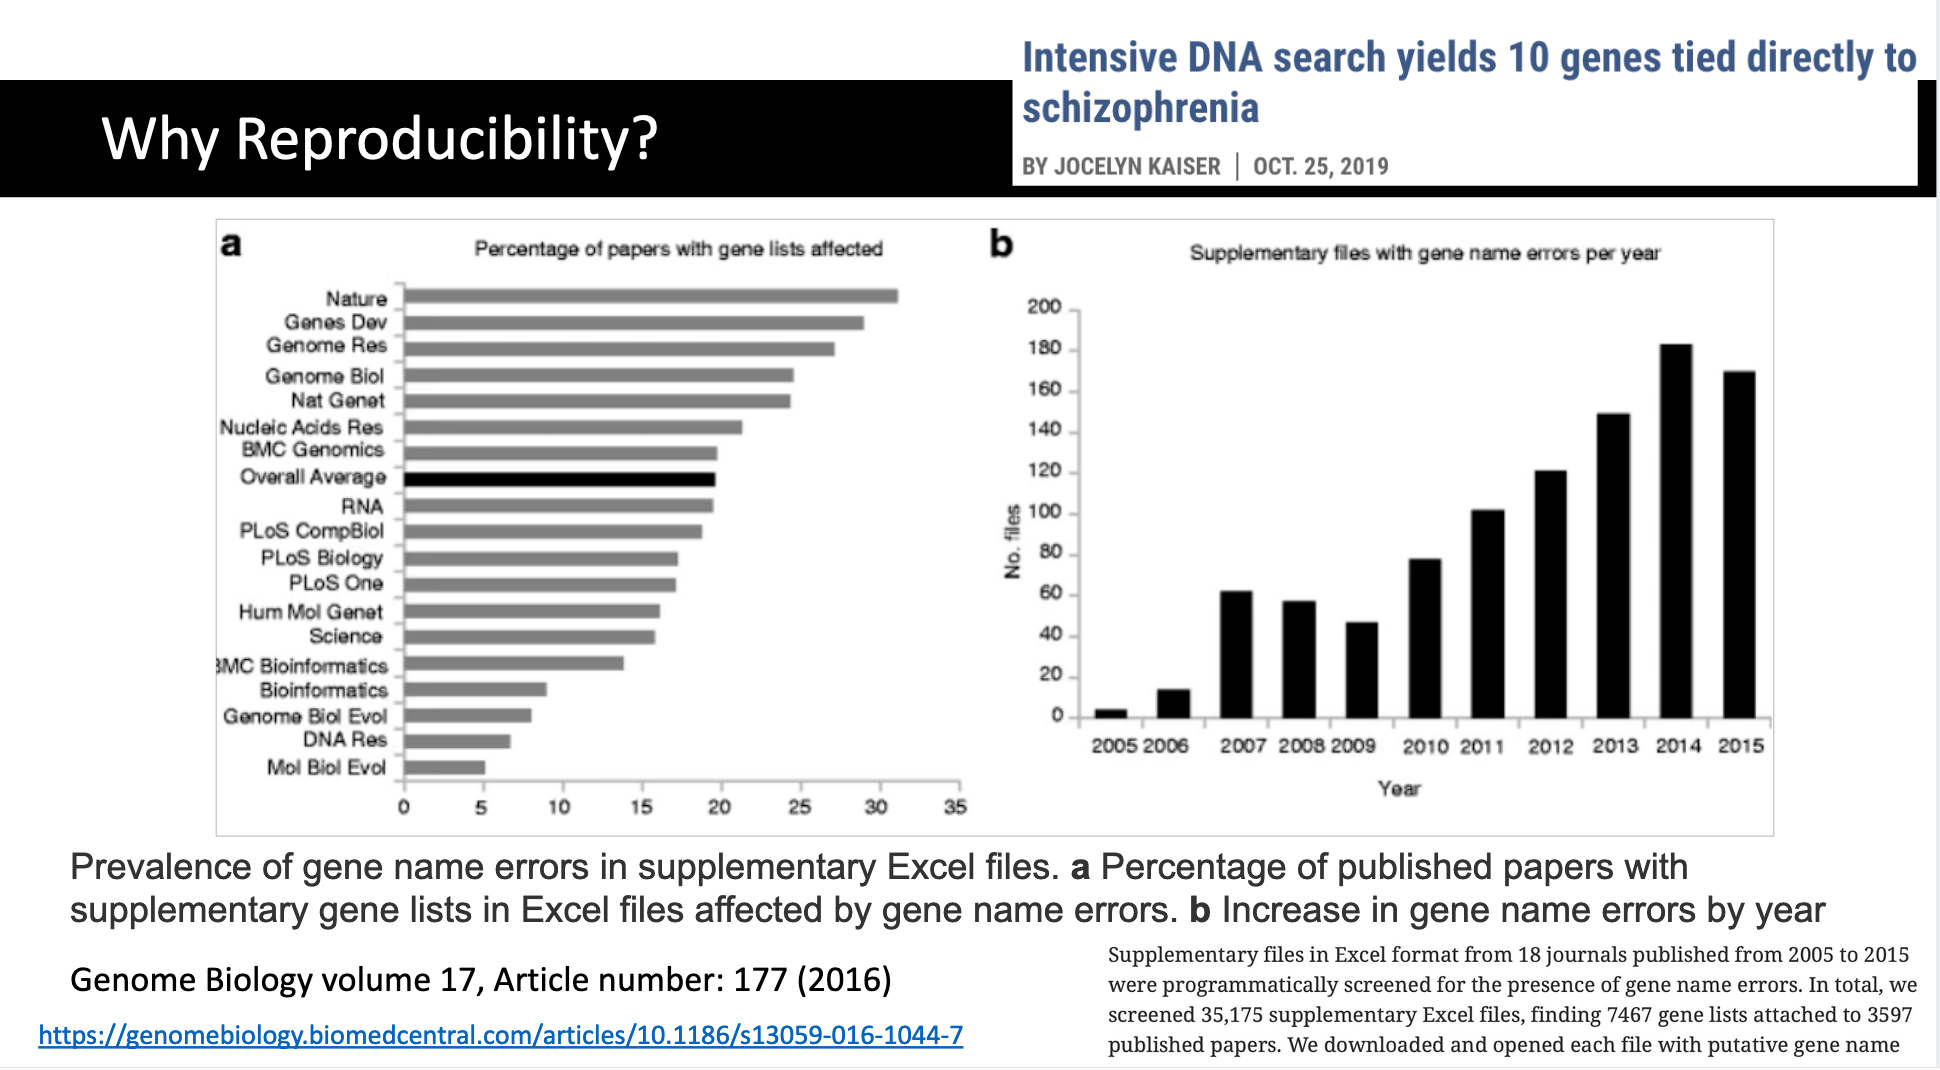

## WHAT ARE SOME OF THE APPROACHES FOR REPRODUCIBLE COMPUTATION
### CODE
- GITHUB 
- COMMENTS IN CODE
### CODE + ENVIRONMENTS
 Whenever you provide code there needs to be a mechanism of executing that code, such as an interpreter or compiler. Modern code usually has multiple dependencies on both system level and external code libraries. Managing this can be quite cumbersome, even for your individual use and gets quickly amplified when trying to make it portable across different machines, OS'es, and providing it to others. 
some ways to mitigate these are to use something like package management systems
- CONDA
- SPACK

### PACKAGED CODE 
- PYPI for python packages
- CRAN for R packages
- NIX
- APT

## Why Containers
 Really simple and light-weight approach to ensure that both code and environment are portable
 
### Use Cases 
source: https://apptainer.org/docs/user/latest/introduction.html#why-use-containers
#### BYOE: Bring Your Own Environment
Engineering work-flows for research computing can be a complicated and iterative process, and even more so on a shared and somewhat inflexible production environment. Apptainer solves this problem by making the environment flexible.

Additionally, it is common (especially in education) for schools to provide a standardized pre-configured Linux distribution to the students which includes all of the necessary tools, programs, and configurations so they can immediately follow along.

#### Reproducible science
Apptainer containers can be built to include all of the programs, libraries, data and scripts such that an entire demonstration can be contained and either archived or distributed for others to replicate no matter what version of Linux they are presently running.

#### Commercially supported code requiring a particular environment
Some commercial applications are only certified to run on particular versions of Linux. If that application was installed into a Apptainer container running the version of Linux that it is certified for, that container could run on any Linux host. The application environment, libraries, and certified stack would all continue to run exactly as it is intended.

Additionally, Apptainer blurs the line between container and host such that your home directory (and other directories) exist within the container. Applications within the container have full and direct access to all files you own thus you can easily incorporate the contained commercial application into your work and process flow on the host.

#### Static environments (software appliances)
Fund once, update never software development model. While this is not ideal, it is a common scenario for research funding. A certain amount of money is granted for initial development, and once that has been done the interns, grad students, post-docs, or developers are reassigned to other projects. This leaves the software stack un-maintained, and even rebuilds for updated compilers or Linux distributions can not be done without unfunded effort.

#### Legacy code on old operating systems
Similar to the above example, while this is less than ideal it is a fact of the research ecosystem. As an example, I know of one Linux distribution which has been end of life for 15 years which is still in production due to the software stack which is custom built for this environment. Apptainer has no problem running that operating system and application stack on a current operating system and hardware.

#### Complicated software stacks that are very host specific
There are various software packages which are so complicated that it takes much effort in order to port, update and qualify to new operating systems or compilers. The atmospheric and weather applications are a good example of this. Porting them to a contained operating system will prolong the usefullness of the development effort considerably.

#### Complicated work-flows that require custom installation and/or data
Consolidating a work-flow into an Apptainer container simplifies distribution and replication of scientific results. Making containers available along with published work enables other scientists to build upon (and verify) previous scientific work.



## So What exactly are containers
Docker containers are like virtual machines except that they share guest OSs, which makes them very lightweight. However, it’s still useful to think of Docker containers as virtual machines, because they feel like their own self-contained units.
https://erick.matsen.org/2018/04/19/docker.html

In fact, focusing on what is abstracted away by virtual machines and containers can help make containers conceptually "click" for you. In short:

- Virtual machines and hypervisors abstract away hardware and enable you to run operating systems

- Containers (technically container engines) abstract away operating systems and enable you to run applications

https://www.cbtnuggets.com/blog/certifications/cloud/container-v-hypervisor-whats-the-difference

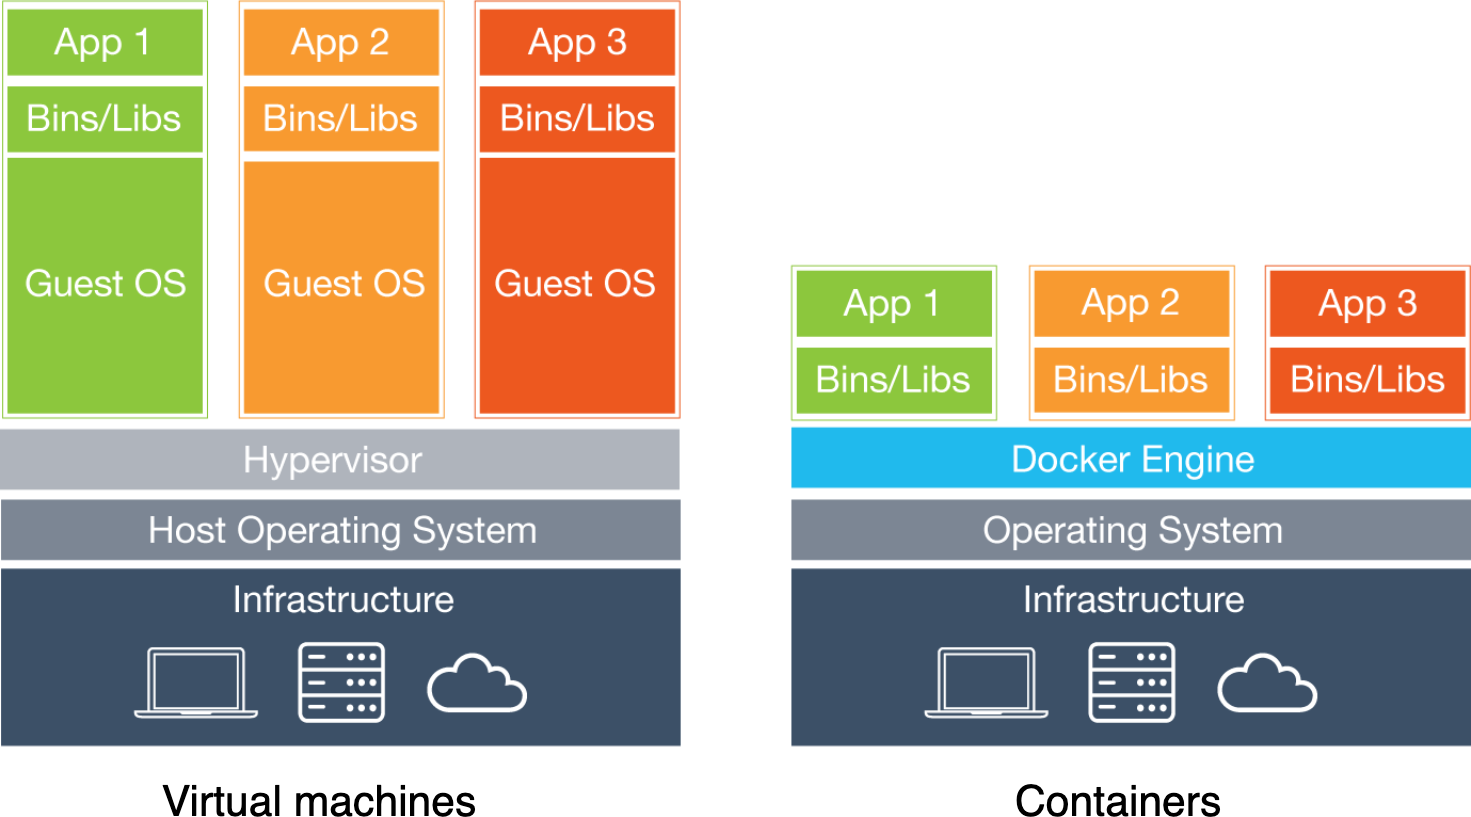

## Some popular or relevant container platforms
- Docker https://www.docker.com/products/docker-desktop/
- Apptainer (formerly singularity) https://apptainer.org/docs/user/latest/introduction.html#why-use-apptainer

### Container Runtime
A container runtime is the foundational software that allows containers to operate within a host system. Container runtime is responsible for everything from pulling container images from a container registry and managing their life cycle to running the containers on your system.

#### Container runtimes vs. container engines
While a container runtime is responsible for running containers, a container engine is a broader system that manages even more of the life cycle of containers, including image distribution, container orchestration, and runtime management. 

One common misconception is that Docker and container runtimes are the same. While Docker Engine includes a container runtime, it also offers a suite of tools for building, shipping, and running containerized applications, making it much more than just a runtime.


https://www.wiz.io/academy/container-runtimes


## A Quick Dive into Containers
- [ ] Download the docker desktop
- [ ] Oscar account?
- [ ] Open ood.ccv.brown.edu

We will use docker locally and apptainer on OSCAR. This is mainly possible due to the Open Container Initiative https://opencontainers.org/

## Some Terminology and concepts
### Containers vs Images
Images are a blueprint and containers are the product of that blueprint. If a Docker image is a map of the house, then a Docker container is an actually built house, or in other words, we can call it an instance of an image. As per the official website, a container is a runnable instance of an image.  
- Images are immutable
- Once a container is running you and modify it, but modifications are lost after the container stops
  https://www.geeksforgeeks.org/difference-between-docker-image-and-container/
### Mount points
These are locations on the host that are mounted on your running container. if your laptop was a container, a mount point is a usb stick. Container platforms differ on how they want you to specify mountpoints and what gets mounted 
- Docker requires you to explicitly mount each location that you want to access from within the container
- Apptainer provides for seamlessly mounting your

### Ports and what not
Docker containers can be run as service, meaning that you might not directly interact with the container or the executables inside. Rather, you will use the container to provide access to an application over the network such as a web-server or a database server. Some examples are using Jupyter notebooks, RStudio  etc. In this case you will need to possibly specify how the networks are translated between the host and the container. The advantage is you can run multiple containers from the same image across different ports.

## So how can we leverage this

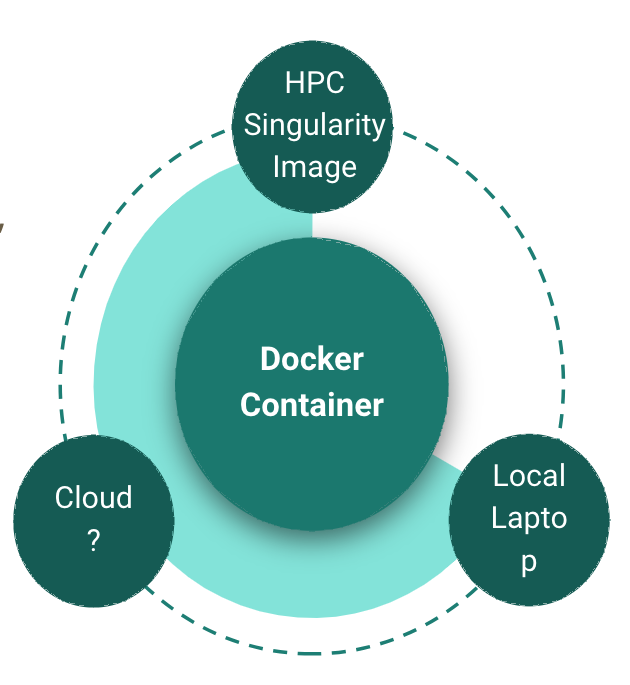

The idea is to be able to seamlessly port your entire environment across multiple platforms. So in the example above, one way is to use a docker container to run an application and then when you need more computational resources, potentially move to a HPC cluster ( here OSCAR) or the cloud. Moving to a cluster is where you would transform your docker container into an apptainer image and this is what we do for the most part here at CCV.

There are a few different methods to port the container
- Build it and push it to some registry and pull from there
- Build it and copy it over to another location


### Basic Commands that are useful

- docker pull / singularity pull 
- docker run / apptainer run: run the container 
- docker exec / apptainer exec: execute a command from the container
- docker images : show what images are 
- docker ps : Show what processes are running
- 

  
Lets run a few test commands so you have an idea of what these do. We will use the lolcow container as an example and work our way through it

Let's start by pulling the docker container 
```
docker pull godlovedc/lolcow
```

```
apptainer pull docker://sylabsio/lolcow
```

Now let get into the container

```
docker ps
docker exec -it <container_id> bash
```

```
appatiner shell <container.sif>
```


Lets try to exec a binary command from the container
```
docker exec -it lolcow cowsay moo
```

```
apptainer exec lolcow_latest.sif cowsay moo
```



### Mounting a directory and ports

With docker, by default the filesystem is separate from the container, meaning we cant access local files, furthermore your user id is not propagated. In apptainer, it is the opposite and by default it mounts your home directory and uses your username and groups permissions. Suppose we want to access files from our home folder on Docker we would use the `--mount` option. We can do it very simply as 
```
docker run -v myhomefolder:folder_on_container <container_name
```
In apptainer, other than the default paths if you need to access a different location then you need to use the `--bind` option

```
apptainer shell --bind /oscar/data/cbc,/oscar/scratch/aragaven:/scratch lolcow_latest.sif
```

Ports are  primarily network access, say when you are trying to access a container that serves a web application or a web interface. 

```
docker run -it -p 10000:8787 rstudio

```

### Some other tips and tricks

- apptainer --cleanenv
- apptainer --compat
- apptainer --fakeroot
- docker system prune
- docker image rm